In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data = pd.read_csv('salaries_merged2.csv')
data.head(5)

,Zip,B19013_001,no_male_hs_p,no_female_hs_p,at_least_hs_male_p,at_least_hs_female_p,at_least_bach_male_p,at_least_bach_female_p,male_unemployment,female_unemployment,...,T51,T53,T99,Place Name,State_y,State Abbreviation,County,Latitude,Longitude,Unnamed: 60
0,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
1,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
2,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
3,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
4,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN


----------------------------------------------------------------------------------------------------
Descriptive stats for salary
----------------------------------------------------------------------------------------------------
count      1412.000000
mean      48847.989464
std       18408.258197
min       10000.000000
25%       37746.750000
50%       44304.000000
75%       56110.750000
max      207060.000000
Name: salary, dtype: float64




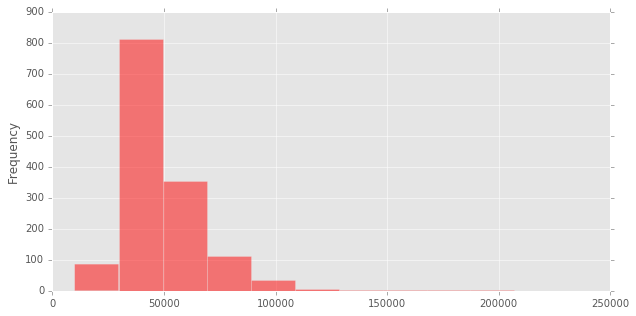

In [23]:
##################################################################
# Utility functions
##################################################################

import matplotlib
matplotlib.style.use('ggplot')

def stats(inSet,feature):
    '''Statistics and distribution for features'''
    # look at descriptive stats and histogram for feature
    # col labels
    # print(inSet[1:1])
    # run stats
    plt.figure(figsize=(10,5))
    print('-'*100)
    print('Descriptive stats for %s' % feature)
    print('-'*100)
    print(inSet[feature].describe())
    print('\n')
    inSet[feature].plot(bins=10, kind='hist', alpha=0.5, subplots=True, color='Red')
    
    
stats(data, 'salary')

In [24]:
data['nSalary'] = pd.isnull(data['salary'])
data2 = data[(data.nSalary == False)]

data2.shape

(1412, 153)

In [25]:
data2.fillna(data2.mean(), inplace=True)
data2.isnull().values.any()

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


True

In [26]:
# including X features
# numeric
X_num_features = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_num = data2.select_dtypes(include=X_num_features)
X_num.drop('salary', axis=1, inplace=True)

# categorical
X_cat = data2.select_dtypes(exclude=X_num_features)

X_num.shape

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1412, 135)

In [27]:
# filling in dummy features

# Function_dummies = pd.get_dummies(X_cat['Function'])
# gender_dummies = pd.get_dummies(X_cat['gender'])
# # print(gender_dummies)
# race_dummies = pd.get_dummies(X_cat['race'])
# highestDegree_dummies = pd.get_dummies(X_cat['highestDegree'])
# Category_dummies = pd.get_dummies(X_cat['Category'])
# instType_dummies = pd.get_dummies(X_cat['instType'])

# X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# # convert to ndarray
# X_dummy_features = X_dummy_features.as_matrix()

In [28]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_num)
X_numeric_imputed = imp.transform(X_num)

In [29]:
# dummy features
X_dummy = []
for i in X_cat.columns:
    temp_dummies = pd.get_dummies(X_cat[i])
    X_dummy.append(temp_dummies)
X_dummy = pd.concat(X_dummy, axis=1)
# X_dummy_features.shape
X_dummy = X_dummy.as_matrix()

In [30]:
X = np.concatenate((X_dummy, X_numeric_imputed), axis=1)
X.shape

(1412, 753)

In [31]:
# y is salary
y = data2.iloc[:, 98].values

print(y)

[ 77308.  70863.  56557. ...,  49088.  32000.  32000.]


In [32]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [33]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [34]:
def report(model, modelLabel):
    # The coefficients
    # print('Coefficients: \n', model.coef_)
    # The mean square error
    print('-' * 100)
    print('#### TEST SET #### ')
    print('-' * 100)    
    # The intercept
    print('Intercept: \n', model.intercept_)
    print('-' * 100)        
    print("Residual sum of squares, test data: %.2f"
          % np.mean((model.predict(X_test) - y_test) ** 2))        
    # Explained variance score: 1 is perfect prediction
    print('-' * 100)
    print('Variance score, test data: %.2f' % model.score(X_test, y_test))
    #vector of prediction error
    print('-' * 100)
    print('Distribution of prediction error on test data:')
    predError = model.predict(X_test) - y_test
    plt.hist(predError)
    plt.show()  

    print('-' * 100)
    print('#### TRAIN SET #### ')
    print('-' * 100)   
    print("Residual sum of squares, training data: %.2f"
          % np.mean((model.predict(X_train) - y_train) ** 2))
    print('-' * 100)   
    print('Variance score, training data: %.2f' % model.score(X_train, y_train))
    print('-' * 100)

    print('Distribution of prediction error on training data:')
    predError = model.predict(X_train) - y_train
    plt.hist(predError)
    plt.show()

    var_to_graph[modelLabel] = np.mean((model.predict(X_test) - y_test) ** 2)
    
def plotModel(model):
    print('-' * 100)   
    print('Plot TEST set:')
    print('-' * 100)   
    
    x = model.predict(X_test)
    plt.scatter(x, y_test,  color='black', alpha=0.5)
    plt.plot(x, x, color='red',
             linewidth=1)
    plt.show()

    print('-' * 100)   
    print('Plot TRAIN set:')
    print('-' * 100)

    x = model.predict(X_train)
    plt.scatter(x, y_train,  color='black', alpha=0.5)
    plt.plot(x, x, color='red',
             linewidth=1)
    plt.show()

Residual sum of squares, training data: 57319450.73
Residual sum of squares, test data: 81629775.48
Variance score, training data: 0.83
Distribution of prediction error on training data:


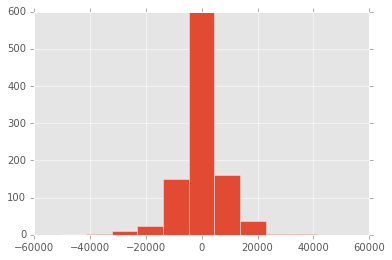

Distribution of prediction error on test data:


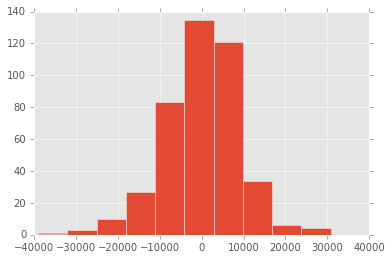

----------------------------------------------------------------------------------------------------
#### TEST SET #### 
----------------------------------------------------------------------------------------------------
Intercept: 
 50987.7780597
----------------------------------------------------------------------------------------------------
Residual sum of squares, test data: 81629775.48
----------------------------------------------------------------------------------------------------
Variance score, test data: 0.75
----------------------------------------------------------------------------------------------------
Distribution of prediction error on test data:


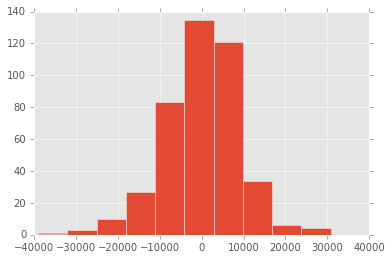

----------------------------------------------------------------------------------------------------
#### TRAIN SET #### 
----------------------------------------------------------------------------------------------------
Residual sum of squares, training data: 57319450.73
----------------------------------------------------------------------------------------------------
Variance score, training data: 0.83
----------------------------------------------------------------------------------------------------
Distribution of prediction error on training data:


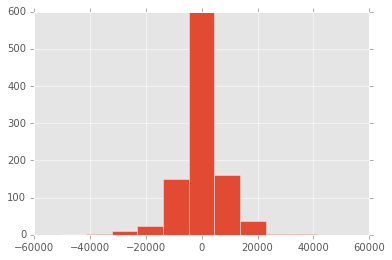

----------------------------------------------------------------------------------------------------
Plot TEST set:
----------------------------------------------------------------------------------------------------


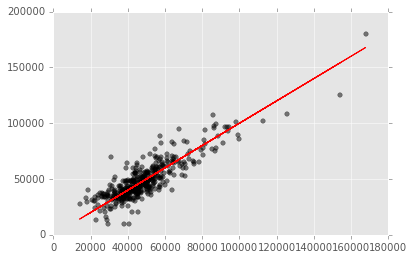

----------------------------------------------------------------------------------------------------
Plot TRAIN set:
----------------------------------------------------------------------------------------------------


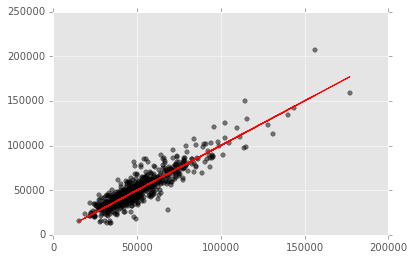

In [35]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
# print('Intercept: \n', regr.intercept_)
# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

report(regr, 'multReg_linear')
plotModel(regr)

Mean Squared Error, training data: 57319450
Mean Squared Error, test data: 81629775
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Variance score, training data: 0.83
Variance score, test data: 0.75
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Distribution of prediction error on training data:


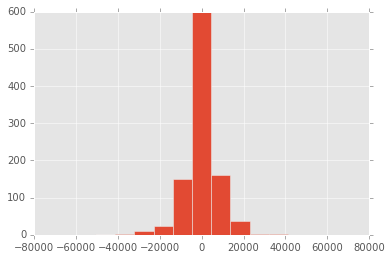

Distribution of prediction error on test data:


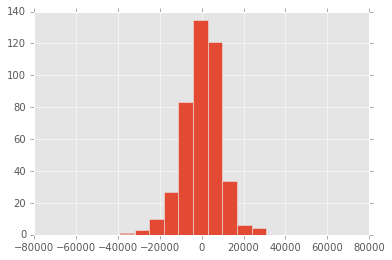

In [36]:
### MODEL PERFORMANCE ###

# The Mean Squared Error
print("Mean Squared Error, training data: %d"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Mean Squared Error, test data: %d"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
print(30 * '* ')

# Variance score
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
print('Variance score, test data: %.2f' % regr.score(X_test, y_test))
print(30 * '* ')

### GRAPHS: DISTRIBUTION OF ERROR ###
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.xlim(-80000, 80000)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.xlim(-80000, 80000)
plt.show()

In [37]:
from sklearn.preprocessing import PolynomialFeatures
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

Residual sum of squares, training data: 63558099.33
Residual sum of squares, test data: 62734408703384433369011107032727552.00
Variance score, training data: 0.81
Distribution of prediction error on training data:


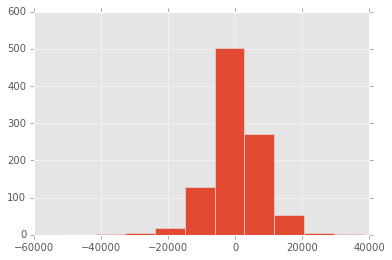

Distribution of prediction error on test data:


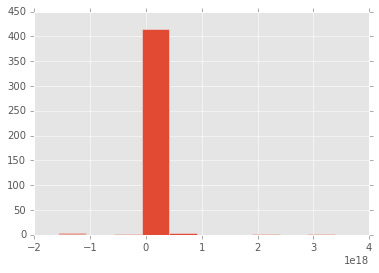

----------------------------------------------------------------------------------------------------
#### TEST SET #### 
----------------------------------------------------------------------------------------------------
Intercept: 
 3.75709585167e+17
----------------------------------------------------------------------------------------------------
Residual sum of squares, test data: 62734408703384433369011107032727552.00
----------------------------------------------------------------------------------------------------
Variance score, test data: -191093295674131732183908352.00
----------------------------------------------------------------------------------------------------
Distribution of prediction error on test data:


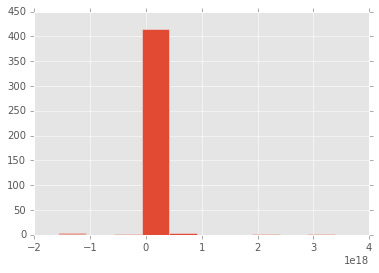

----------------------------------------------------------------------------------------------------
#### TRAIN SET #### 
----------------------------------------------------------------------------------------------------
Residual sum of squares, training data: 63558099.33
----------------------------------------------------------------------------------------------------
Variance score, training data: 0.81
----------------------------------------------------------------------------------------------------
Distribution of prediction error on training data:


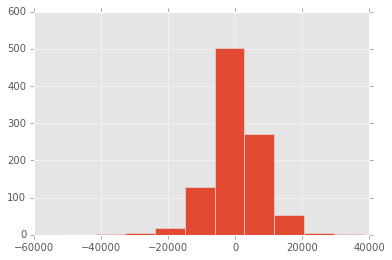

----------------------------------------------------------------------------------------------------
Plot TEST set:
----------------------------------------------------------------------------------------------------


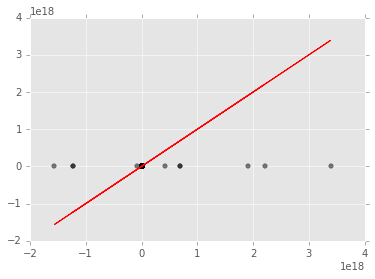

----------------------------------------------------------------------------------------------------
Plot TRAIN set:
----------------------------------------------------------------------------------------------------


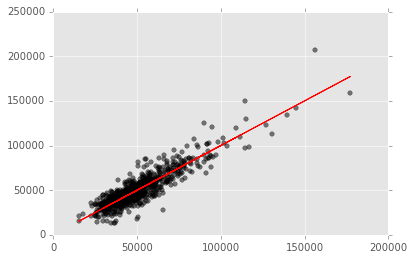

In [38]:
## POLYNOMINAL 
from sklearn import datasets, linear_model

# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
# print('Intercept: \n', poly.intercept_)
# The coefficients
# print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

report(poly, 'multReg_poly' )
plotModel(poly)

Mean Squared Error, training data: 57319450
Mean Squared Error, test data: 81629775
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Variance score, training data: 0.83
Variance score, test data: 0.75
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Distribution of prediction error on training data:


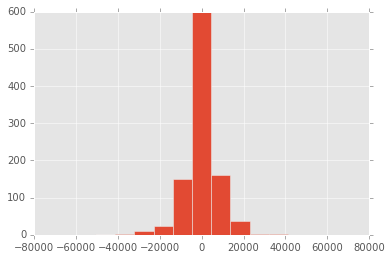

Distribution of prediction error on test data:


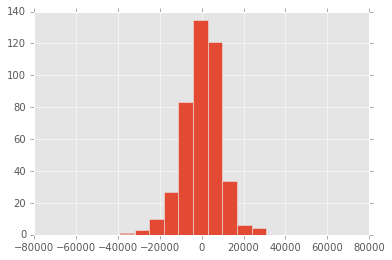

In [39]:
### MODEL PERFORMANCE ###

# The Mean Squared Error
print("Mean Squared Error, training data: %d"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Mean Squared Error, test data: %d"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
print(30 * '* ')

# Variance score
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
print('Variance score, test data: %.2f' % regr.score(X_test, y_test))
print(30 * '* ')

### GRAPHS: DISTRIBUTION OF ERROR ###
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.xlim(-80000, 80000)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.xlim(-80000, 80000)
plt.show()

Residual sum of squares, training data: 58311575.32
Residual sum of squares, test data: 80243320.76
Variance score, training data: 0.83
Distribution of prediction error on training data:


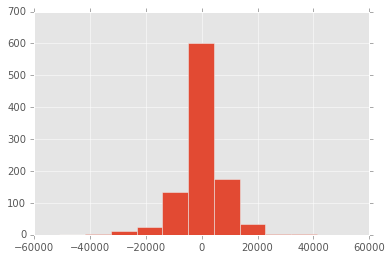

Distribution of prediction error on test data:


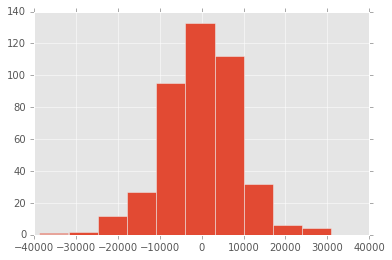

----------------------------------------------------------------------------------------------------
#### TEST SET #### 
----------------------------------------------------------------------------------------------------
Intercept: 
 17798.1238946
----------------------------------------------------------------------------------------------------
Residual sum of squares, test data: 80243320.76
----------------------------------------------------------------------------------------------------
Variance score, test data: 0.76
----------------------------------------------------------------------------------------------------
Distribution of prediction error on test data:


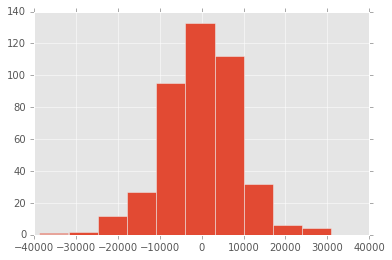

----------------------------------------------------------------------------------------------------
#### TRAIN SET #### 
----------------------------------------------------------------------------------------------------
Residual sum of squares, training data: 58311575.32
----------------------------------------------------------------------------------------------------
Variance score, training data: 0.83
----------------------------------------------------------------------------------------------------
Distribution of prediction error on training data:


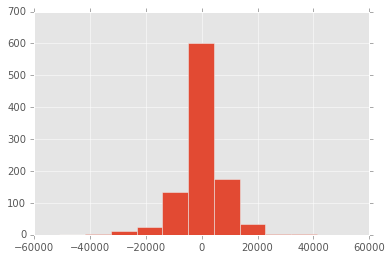

----------------------------------------------------------------------------------------------------
Plot TEST set:
----------------------------------------------------------------------------------------------------


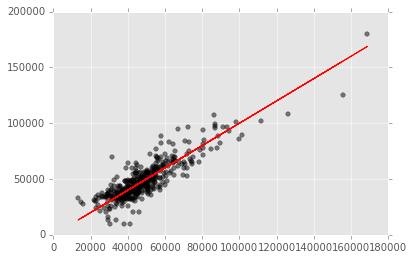

----------------------------------------------------------------------------------------------------
Plot TRAIN set:
----------------------------------------------------------------------------------------------------


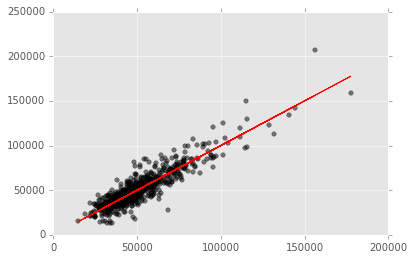

In [40]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
# from sklearn.cross_validation import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#          X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
# print('Intercept: \n', regr.intercept_)
# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

report(regr, 'multReg_poly' )
plotModel(regr)

Mean Squared Error, training data: 58311575
Mean Squared Error, test data: 80243320
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Variance score, training data: 0.83
Variance score, test data: 0.76
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Distribution of prediction error on training data:


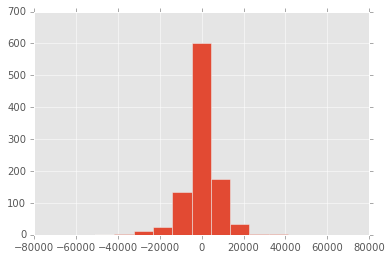

Distribution of prediction error on test data:


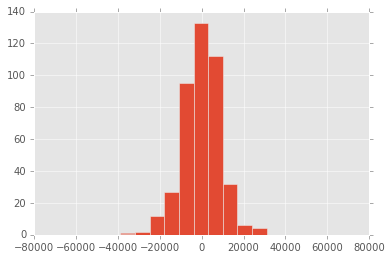

In [41]:

### MODEL PERFORMANCE ###

# The Mean Squared Error
print("Mean Squared Error, training data: %d"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Mean Squared Error, test data: %d"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
print(30 * '* ')

# Variance score
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
print('Variance score, test data: %.2f' % regr.score(X_test, y_test))
print(30 * '* ')

### GRAPHS: DISTRIBUTION OF ERROR ###
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.xlim(-80000, 80000)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.xlim(-80000, 80000)
plt.show()

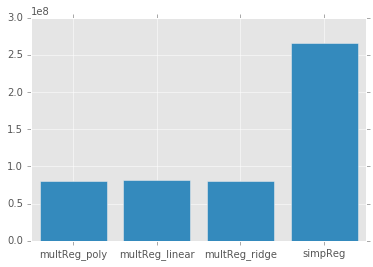

In [42]:
# bar graph of dict with Residual Sum of Squares on test datasets

#var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()